In [1]:
import pandas as pd
import xmltodict
input_path = './data/apple_health_export/export.xml'

with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())
    


In [2]:
records_list = input_data['HealthData']['Record']

In [3]:
df = pd.DataFrame(records_list)

In [4]:
df.columns

Index(['@type', '@sourceName', '@sourceVersion', '@unit', '@creationDate',
       '@startDate', '@endDate', '@value', 'MetadataEntry', '@device',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [42]:
df['@type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
       'HKQuan

In [44]:
heart_rate = df[df['@type'] == 'HKQuantityTypeIdentifierHeartRate']
format = '%Y-%m-%d %H:%M:%S %z'
df['@creationDate'] = pd.to_datetime(df['@creationDate'],
                                     format=format)
df['@startDate'] = pd.to_datetime(df['@startDate'],
                                  format=format)
df['@endDate'] = pd.to_datetime(df['@endDate'],
                                format=format)
df['@creationDateOnly'] = df['@creationDate'].dt.date

In [49]:
heart_rate.loc[:, '@value'] = pd.to_numeric(
    heart_rate.loc[:, '@value'])

In [50]:
heart_rate.dtypes

@type                                                               object
@sourceName                                                         object
@sourceVersion                                                      object
@unit                                                               object
@creationDate                       datetime64[ns, pytz.FixedOffset(-240)]
@startDate                          datetime64[ns, pytz.FixedOffset(-240)]
@endDate                            datetime64[ns, pytz.FixedOffset(-240)]
@value                                                             float64
MetadataEntry                                                       object
@device                                                             object
HeartRateVariabilityMetadataList                                    object
@creationDateOnly                                                   object
dtype: object

In [51]:
heart_rate_by_creation = heart_rate.groupby('@creationDate').sum()
heart_rate_by_creation


,@value
@creationDate,
2020-02-13 22:25:18-04:00,69.0
2020-02-13 22:30:47-04:00,77.0
2020-02-13 22:31:23-04:00,74.0
2020-02-13 22:31:27-04:00,69.0
2020-02-13 22:31:32-04:00,70.0
...,...
2020-10-01 18:23:11-04:00,76.0
2020-10-01 18:28:52-04:00,85.0
2020-10-01 18:32:50-04:00,75.0


In [52]:
by_day = heart_rate_by_creation['@value'].resample('M').sum()
by_day

@creationDate
2020-02-29 00:00:00-04:00    2.587682e+05
2020-03-31 00:00:00-04:00    4.855404e+05
2020-04-30 00:00:00-04:00    3.856637e+05
2020-05-31 00:00:00-04:00    3.518274e+05
2020-06-30 00:00:00-04:00    4.585690e+05
2020-07-31 00:00:00-04:00    4.378552e+06
2020-08-31 00:00:00-04:00    2.913533e+06
2020-09-30 00:00:00-04:00    3.265240e+06
2020-10-31 00:00:00-04:00    1.159619e+05
Freq: M, Name: @value, dtype: float64

<AxesSubplot:xlabel='@creationDate'>

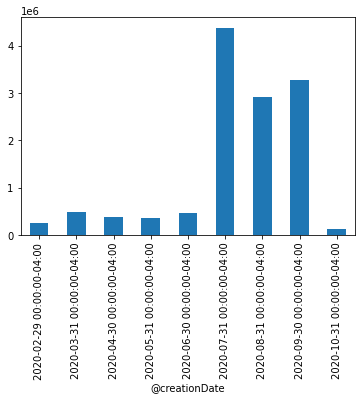

In [53]:
import calendar

by_day.plot(kind='bar')



In [54]:
heart_rate_by_creation.to_csv('out.csv')

In [56]:
heart_rate_mean_by_day = heart_rate.groupby('@creationDateOnly').mean()
heart_rate_mean_by_day

,@value
@creationDateOnly,
2020-02-13,72.375000
2020-02-14,72.171400
2020-02-15,73.341418
2020-02-16,90.551067
2020-02-17,77.331632
...,...
2020-09-27,72.816614
2020-09-28,107.628683
2020-09-29,88.305299
